In [48]:

"""
DEBUGs and EDITs

- Look into why the xr_wins column is all 0 (fixed) datatype issue


"""



'\nDEBUGs and EDITs\n\n- Look into why the xr_wins column is all 0 (fixed) datatype issue\n\n\n'

In [49]:

from datetime import datetime
import pytz

# Get the current UTC time
utc_now = datetime.now(pytz.utc)

# Convert it to local time
#local_tz = pytz.timezone('America/Los_Angeles')  # Replace with your timezone
local_tz = pytz.timezone('Asia/Kolkata')  # Set timezone to India (IST)
local_now = utc_now.astimezone(local_tz)

print(local_now)


2023-06-08 17:17:38.864529+05:30


In [50]:
## The code below aims to reduce the runtime of the normalisation function significantly - Author is ChatGPT

In [51]:
"""
print(datetime.now())

for curr_col in cols_to_norm:

    mean_name = curr_col + '_mean'
    std_name = curr_col + '_std'
    norm_name = curr_col + '_norm'

    print(mean_name, std_name, norm_name)

    ds_norm = df_base.groupby('@id_RACE')[curr_col].agg(['mean','std']).reset_index().rename(columns = {'mean':mean_name, 'std':std_name})

    df_base = df_base.merge(ds_norm, on='@id_RACE')

    # Check for rows with zero or NaN standard deviation
    zero_std_mask = (df_base[std_name] == 0) | (df_base[std_name].isna())

    # Normalize the column
    df_base[norm_name] = (df_base[curr_col] - df_base[mean_name]) / df_base[std_name]

    # Set the normalized value to 0 for rows with zero or NaN standard deviation
    df_base.loc[zero_std_mask, norm_name] = 0

    df_base.drop(columns=[mean_name, std_name], inplace=True)

    del ds_norm, mean_name, std_name, norm_name

print()
print(datetime.now())
"""

"\nprint(datetime.now())\n\nfor curr_col in cols_to_norm:\n\n    mean_name = curr_col + '_mean'\n    std_name = curr_col + '_std'\n    norm_name = curr_col + '_norm'\n\n    print(mean_name, std_name, norm_name)\n\n    ds_norm = df_base.groupby('@id_RACE')[curr_col].agg(['mean','std']).reset_index().rename(columns = {'mean':mean_name, 'std':std_name})\n\n    df_base = df_base.merge(ds_norm, on='@id_RACE')\n\n    # Check for rows with zero or NaN standard deviation\n    zero_std_mask = (df_base[std_name] == 0) | (df_base[std_name].isna())\n\n    # Normalize the column\n    df_base[norm_name] = (df_base[curr_col] - df_base[mean_name]) / df_base[std_name]\n\n    # Set the normalized value to 0 for rows with zero or NaN standard deviation\n    df_base.loc[zero_std_mask, norm_name] = 0\n\n    df_base.drop(columns=[mean_name, std_name], inplace=True)\n\n    del ds_norm, mean_name, std_name, norm_name\n\nprint()\nprint(datetime.now())\n"

# CONSOLIDATE DatePrep

In [52]:

#fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one/code/Users/karan.bhatti'
fileloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Dataprep'
outloc  = '/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Dataprep'

import sys
print(sys.path)
print()
#sys.path.append(f'{fileloc}')
print()
#print(sys.path)


['/mnt/batch/tasks/shared/LS_root/mounts/clusters/compute-one-8c-32gb/code/Users/karan.bhatti/Code', '/anaconda/envs/azureml_py38/lib/python38.zip', '/anaconda/envs/azureml_py38/lib/python3.8', '/anaconda/envs/azureml_py38/lib/python3.8/lib-dynload', '', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/_project/vendor', '/anaconda/envs/azureml_py38/lib/python3.8/site-packages/azureml/automl/core/_vendor']




In [53]:

class Data(object):
    pass

df = Data
summ = Data


In [54]:
import helpdesk as hd

In [95]:

import pandas as pd, numpy as np, os
from datetime import datetime

from collections import defaultdict


In [56]:

DEBUG = True
seed = 1919


In [57]:
pd.set_option('display.max_rows', 50);

In [58]:
pd.set_option('display.max_columns', 50);

In [59]:
pd.set_option('display.width', 200);

In [93]:

"""
# Get a list of all files in the current working directory
files = os.listdir(fileloc)

# Print the list of files
for file in files:
    print(file)
"""


'\n# Get a list of all files in the current working directory\nfiles = os.listdir(fileloc)\n\n# Print the list of files\nfor file in files:\n    print(file)\n'

In [97]:

# Get a list of all files in the current working directory
files = os.listdir(fileloc)

# Dictionary where the keys are filename prefixes and the values are lists of (date, filename) tuples
file_dict = defaultdict(list)

# Loop over all files
for file in files:
    # Exclude files without a date in their name
    if '_' in file and '.csv' in file:
        prefix, date_str = file.rsplit('_', 1)
        date_str = date_str.replace('.csv', '')

        # Try to parse the date from the filename
        try:
            date = datetime.strptime(date_str, "%Y-%m-%d")
        except ValueError:
            continue  # skip files with incorrect date format

        file_dict[prefix].append((date, file))

# Sort the files in each group by date and print the latest 3 files in each group
for prefix, file_list in file_dict.items():
    file_list.sort()  # sorts in ascending order by date
    print()
    print(f"Last 3 files for prefix '{prefix}':")
    for date, file in file_list[-3:]:  # take the last 3 files
        print(file)



Last 3 files for prefix 'dataprep_categorical':
dataprep_categorical_2022-12-03.csv
dataprep_categorical_2023-02-22.csv
dataprep_categorical_2023-06-07.csv

Last 3 files for prefix 'dataprep_performance':
dataprep_performance_2023-02-22.csv
dataprep_performance_2023-06-07.csv
dataprep_performance_2023-06-08.csv

Last 3 files for prefix 'dataprep_raceprofile':
dataprep_raceprofile_2022-12-03.csv
dataprep_raceprofile_2023-02-22.csv
dataprep_raceprofile_2023-06-07.csv

Last 3 files for prefix 'dataprep_speed_profile':
dataprep_speed_profile_2022-12-03.csv
dataprep_speed_profile_2023-02-22.csv
dataprep_speed_profile_2023-06-06.csv

Last 3 files for prefix 'dataprep_TRNR_performance':
dataprep_TRNR_performance_2023-02-22.csv
dataprep_TRNR_performance_2023-06-07.csv
dataprep_TRNR_performance_2023-06-08.csv

Last 3 files for prefix 'dataset_base':
dataset_base_2022-12-16.csv
dataset_base_2023-02-09.csv
dataset_base_2023-06-05.csv

Last 3 files for prefix 'dataset_base_doggrading':
dataset_ba

In [98]:

# Import the Base Dataset
base_dataset_name = 'dataset_base_2023-06-05.csv'

keep_cols_for_join = ['@id_DOG','@id_RACE','TrainerId']

df_base_raw = pd.read_csv(f'{fileloc}/{base_dataset_name}')[keep_cols_for_join]

print(df_base_raw.shape)
print()
print(df_base_raw.columns.values.tolist())


(725080, 3)

['@id_DOG', '@id_RACE', 'TrainerId']


In [99]:

print(pd.DataFrame(df_base_raw.isna().sum()).transpose())


   @id_DOG  @id_RACE  TrainerId
0        0         0          0


In [100]:
# Import the Speed Profile

speed_profile_name = 'dataprep_speed_profile_2023-06-06.csv'

df_speed_profile = pd.read_csv(f'{fileloc}/{speed_profile_name}')

print(df_speed_profile.shape)
print()
print(df_speed_profile.columns.values.tolist())
print()


(725080, 25)

['@id_DOG', 'Handicap', '@id_RACE', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg_v0', 'x_rtgp_min_v0', 'x_rtgp_max_v0', 'x_rtgp_range_v0', 'x_rtgp_std_v0', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range', 'x_no_prev_r_in_dist']



In [101]:

print(pd.DataFrame(df_speed_profile.isna().sum()).transpose())


   @id_DOG  Handicap  @id_RACE  x_races_tot  x_dist_gp  x_runtm_gp  x_rtgp_prev  x_rtgp_avg_v0  x_rtgp_min_v0  x_rtgp_max_v0  x_rtgp_range_v0  x_rtgp_std_v0  x_rtgp_avg  x_rtgp_min  x_rtgp_max  \
0        0    725080         0            0          0           0            0          89140          89140          89140            89140         160923           0           0           0   

   x_rtgp_std  x_rtgp_range  x_no_prev_races  x_speed_prev  x_speed_avg  x_speed_min  x_speed_max  x_speed_std  x_speed_range  x_no_prev_r_in_dist  
0           0             0                0             0            0            0            0            0              0                    0  


In [102]:

"""
# Import the Race Profile
race_profile_name = 'dataprep_raceprofile_2022-06-07.csv'

df_race_profile = pd.read_csv(f'{fileloc}/{race_profile_name}')

print(df_race_profile.shape)
print()
print(df_race_profile.columns.values.tolist())
"""


"\n# Import the Race Profile\nrace_profile_name = 'dataprep_raceprofile_2022-06-07.csv'\n\ndf_race_profile = pd.read_csv(f'{fileloc}/{race_profile_name}')\n\nprint(df_race_profile.shape)\nprint()\nprint(df_race_profile.columns.values.tolist())\n"

In [103]:

#print(pd.DataFrame(df_race_profile.isna().sum()).transpose())


In [104]:

"""
# Import the Race Profile
dateprep_categorical = 'dataprep_categorical_2022-06-07.csv'

df_categorical = pd.read_csv(f'{fileloc}/{dateprep_categorical}')

print(df_categorical.shape)
print()
print(df_categorical.columns.values.tolist())
"""


"\n# Import the Race Profile\ndateprep_categorical = 'dataprep_categorical_2022-06-07.csv'\n\ndf_categorical = pd.read_csv(f'{fileloc}/{dateprep_categorical}')\n\nprint(df_categorical.shape)\nprint()\nprint(df_categorical.columns.values.tolist())\n"

In [105]:

#print(pd.DataFrame(df_categorical.isna().sum()).transpose())


In [106]:

# Import the Performance Dataset
dateprep_perf = 'dataprep_performance_2023-06-08.csv'

df_perf = pd.read_csv(f'{fileloc}/{dateprep_perf}')

print(df_perf.shape)
print()
print(df_perf.columns.values.tolist())


(725080, 25)

['@id_DOG', 'Handicap', '@id_RACE', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct']


In [107]:

print(pd.DataFrame(df_perf.isna().sum()).transpose())


   @id_DOG  Handicap  @id_RACE  xr_races  xr_races_l5  xr_wins  xr_wins_pct  xr_wins_l5  xr_wins_l5_pct  xr_fin_t2  xr_finl5_t2  xr_fin_t2_pct  xr_finl5_t2_pct  xr_fin_last  xr_fin_last_pct  \
0        0    725080         0         0            0        0            0           0               0          0       725080              0                0            0            30513   

   xr_finl5_last  xr_finl5_last_pct  xr_fin_last2  xr_fin_last2_pct  xr_finl5_last2  xr_finl5_last2_pct  xr_fin_plc  xr_fin_plc_pct  xr_finl5_plc  xr_finl5_plc_pct  
0              0                  0             0                 0               0                   0           0               0             0                 0  


In [108]:

# Import the Performance Dataset
dateprep_trnr_perf = 'dataprep_TRNR_performance_2023-06-08.csv'

df_trnr_perf = pd.read_csv(f'{fileloc}/{dateprep_trnr_perf}')

print(df_trnr_perf.shape)
print()
print(df_trnr_perf.columns.values.tolist())



(661072, 25)

['TrainerId', '@id_RACE', 'Event_Dt', 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_xr_fin_t2', 'trnr_xr_fin_last', 'trnr_xr_fin_last2', 'trnr_xrl5_wins', 'trnr_xrl5_fin_plc', 'trnr_xrl5_fin_t2', 'trnr_xrl5_fin_last', 'trnr_xrl5_fin_last2', 'trnr_xr_wins_pct', 'trnr_xr_fin_t2_pct', 'trnr_xr_fin_plc_pct', 'trnr_xr_fin_last_pct', 'trnr_xr_fin_last2_pct']


In [109]:

print(pd.DataFrame(df_trnr_perf.isna().sum()).transpose())


   TrainerId  @id_RACE  Event_Dt  trnr_xr_races_tot  trnr_xr_races_tot_prev  trnr_wins_prev  trnr_fin_plc_prev  trnr_fin_t2_prev  trnr_fin_last_prev  trnr_fin_last2_prev  trnr_xr_wins  \
0          0         0         0                  0                       0               0                  0                 0                   0                    0             0   

   trnr_xr_fin_plc  trnr_xr_fin_t2  trnr_xr_fin_last  trnr_xr_fin_last2  trnr_xrl5_wins  trnr_xrl5_fin_plc  trnr_xrl5_fin_t2  trnr_xrl5_fin_last  trnr_xrl5_fin_last2  trnr_xr_wins_pct  \
0                0               0                 0                  0               0                  0                 0                   0                    0                 0   

   trnr_xr_fin_t2_pct  trnr_xr_fin_plc_pct  trnr_xr_fin_last_pct  trnr_xr_fin_last2_pct  
0                   0                    0                     0                      0  


In [110]:

"""
# Import the Grading Dataset
dateprep_grading = 'dataset_base_grading_2022-12-16.csv'

df_grading = pd.read_csv(f'{fileloc}/{dateprep_grading}')

print(df_grading.shape)
print()
print(df_grading.columns.values.tolist())
"""


"\n# Import the Grading Dataset\ndateprep_grading = 'dataset_base_grading_2022-12-16.csv'\n\ndf_grading = pd.read_csv(f'{fileloc}/{dateprep_grading}')\n\nprint(df_grading.shape)\nprint()\nprint(df_grading.columns.values.tolist())\n"

In [111]:

#print(pd.DataFrame(df_grading.isna().sum()).transpose())


#### Merging all the Dataset here

In [112]:

# Merge the datasets together
"""
print(df_base_raw.shape)
print(df_speed_profile.shape)
print(df_race_profile.shape)

print()
print()
df_base0 = pd.merge( df_base_raw, df_speed_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base0.shape)
print(df_base0.columns.values.tolist())

print()
print()
df_base1 = pd.merge( df_base0, df_race_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base1.shape)
print(df_base1.columns.values.tolist())

print()
print()
df_base2 = pd.merge( df_base1, df_categorical.drop(columns = ['DogName','Distance','x_dist_gp']), on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base2.shape)
print(df_base2.columns.values.tolist())

print()
print()
df_base3 = pd.merge( df_base2, df_perf, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base3.shape)
print(df_base3.columns.values.tolist())

print(datetime.now())
"""


"\nprint(df_base_raw.shape)\nprint(df_speed_profile.shape)\nprint(df_race_profile.shape)\n\nprint()\nprint()\ndf_base0 = pd.merge( df_base_raw, df_speed_profile, on = ['@id_DOG','@id_RACE'], how = 'left')\nprint(df_base0.shape)\nprint(df_base0.columns.values.tolist())\n\nprint()\nprint()\ndf_base1 = pd.merge( df_base0, df_race_profile, on = ['@id_DOG','@id_RACE'], how = 'left')\nprint(df_base1.shape)\nprint(df_base1.columns.values.tolist())\n\nprint()\nprint()\ndf_base2 = pd.merge( df_base1, df_categorical.drop(columns = ['DogName','Distance','x_dist_gp']), on = ['@id_DOG','@id_RACE'], how = 'left')\nprint(df_base2.shape)\nprint(df_base2.columns.values.tolist())\n\nprint()\nprint()\ndf_base3 = pd.merge( df_base2, df_perf, on = ['@id_DOG','@id_RACE'], how = 'left')\nprint(df_base3.shape)\nprint(df_base3.columns.values.tolist())\n\nprint(datetime.now())\n"

In [113]:

# Merge the datasets together

print(df_base_raw.shape)
print(df_speed_profile.shape)

print()
print()
df_base0 = pd.merge( df_base_raw, df_speed_profile, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base0.shape)
print(df_base0.columns.values.tolist())


print(df_perf.shape)

print()
print()
df_base1 = pd.merge( df_base0, df_perf, on = ['@id_DOG','@id_RACE'], how = 'left')
print(df_base1.shape)
print(df_base1.columns.values.tolist())

print()
print(datetime.now())


(725080, 3)
(725080, 25)


(725080, 26)
['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg_v0', 'x_rtgp_min_v0', 'x_rtgp_max_v0', 'x_rtgp_range_v0', 'x_rtgp_std_v0', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range', 'x_no_prev_r_in_dist']
(725080, 25)


(725080, 49)
['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg_v0', 'x_rtgp_min_v0', 'x_rtgp_max_v0', 'x_rtgp_range_v0', 'x_rtgp_std_v0', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range', 'x_no_prev_r_in_dist', 'Handicap_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr

In [114]:

print(datetime.now())

print()
print()
df_base = pd.merge( df_base1, df_trnr_perf, on = ['TrainerId','@id_RACE'], how = 'left')
print(df_base.shape)
print(df_base.columns.values.tolist())

print()
print(datetime.now())


2023-06-08 11:54:17.408078


(725080, 72)
['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg_v0', 'x_rtgp_min_v0', 'x_rtgp_max_v0', 'x_rtgp_range_v0', 'x_rtgp_std_v0', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range', 'x_no_prev_r_in_dist', 'Handicap_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct', 'Event_Dt', 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins'

In [115]:

del df_base0, df_base1


In [116]:

print(pd.DataFrame(df_base.isna().sum()).transpose())


   @id_DOG  @id_RACE  TrainerId  Handicap_x  x_races_tot  x_dist_gp  x_runtm_gp  x_rtgp_prev  x_rtgp_avg_v0  x_rtgp_min_v0  x_rtgp_max_v0  x_rtgp_range_v0  x_rtgp_std_v0  x_rtgp_avg  x_rtgp_min  \
0        0         0          0      725080            0          0           0            0          89140          89140          89140            89140         160923           0           0   

   x_rtgp_max  x_rtgp_std  x_rtgp_range  x_no_prev_races  x_speed_prev  x_speed_avg  x_speed_min  x_speed_max  x_speed_std  x_speed_range  ...  xr_finl5_plc  xr_finl5_plc_pct  Event_Dt  \
0           0           0             0                0             0            0            0            0            0              0  ...             0                 0         0   

   trnr_xr_races_tot  trnr_xr_races_tot_prev  trnr_wins_prev  trnr_fin_plc_prev  trnr_fin_t2_prev  trnr_fin_last_prev  trnr_fin_last2_prev  trnr_xr_wins  trnr_xr_fin_plc  trnr_xr_fin_t2  \
0                  0                   

### Normalising the x_speed_prev in Each RaceId

In [117]:

"""
NOTE:
    When mean is 0 created flag - No Prev Races
    When std is 0 create flag - No Std
    
Q Sau takke ka sawaal ? 
    Missing Norm values be replaced with 0 or 0.5.
        Currently used 0.5    

print(datetime.now())

ds_norm = df_base1.groupby('@id_RACE')['x_speed_prev'].agg( ['mean','std'] ).reset_index().rename(columns = {'mean':'x_speed_prev_mean', 'std':'x_speed_prev_std'} )

df_base1 = df_base1.merge( ds_norm , on = '@id_RACE' )
df_base1['x_no_speed_prev_std'] = df_base1['x_speed_prev_std'].apply(lambda x : 1 if x == 0 else 0 )

df_base1['x_speed_prev_norm'] = (df_base1['x_speed_prev'] - df_base1['x_speed_prev_mean']) / df_base1['x_speed_prev_std']
df_base1['x_speed_prev_norm'] = df_base1.apply(lambda x : 0.5 if (x.x_speed_prev_mean == 0) | (x.x_speed_prev_std == 0) | (pd.isna(x.x_speed_prev_std)) else ( x.x_speed_prev - x.x_speed_prev_mean ) / x.x_speed_prev_std, axis = 1) 
#df_base1['x_speed_prev_norm'] = df_base1['x_speed_prev_norm'].fillna(0.5)

"""

print(datetime.now())


2023-06-08 11:54:17.858861


In [118]:

# QC the Transformation
if DEBUG:
    print(pd.DataFrame(df_base.isna().sum()).transpose())
    qc_missing = pd.DataFrame(df_base.isna().sum())

    #qc_missing.to_csv()
    qc_missing.to_csv(f'{outloc}/missing.csv', index = False)


   @id_DOG  @id_RACE  TrainerId  Handicap_x  x_races_tot  x_dist_gp  x_runtm_gp  x_rtgp_prev  x_rtgp_avg_v0  x_rtgp_min_v0  x_rtgp_max_v0  x_rtgp_range_v0  x_rtgp_std_v0  x_rtgp_avg  x_rtgp_min  \
0        0         0          0      725080            0          0           0            0          89140          89140          89140            89140         160923           0           0   

   x_rtgp_max  x_rtgp_std  x_rtgp_range  x_no_prev_races  x_speed_prev  x_speed_avg  x_speed_min  x_speed_max  x_speed_std  x_speed_range  ...  xr_finl5_plc  xr_finl5_plc_pct  Event_Dt  \
0           0           0             0                0             0            0            0            0            0              0  ...             0                 0         0   

   trnr_xr_races_tot  trnr_xr_races_tot_prev  trnr_wins_prev  trnr_fin_plc_prev  trnr_fin_t2_prev  trnr_fin_last_prev  trnr_fin_last2_prev  trnr_xr_wins  trnr_xr_fin_plc  trnr_xr_fin_t2  \
0                  0                   

In [119]:

print(df_base.columns.values.tolist())


['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg_v0', 'x_rtgp_min_v0', 'x_rtgp_max_v0', 'x_rtgp_range_v0', 'x_rtgp_std_v0', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range', 'x_no_prev_r_in_dist', 'Handicap_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct', 'Event_Dt', 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_xr_fin_t2', 'tr

In [120]:

print(len(df_base.columns.values.tolist()))


72


In [121]:

#df_base1['x_rtgp_prev'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_avg'].plot( kind='density', legend=True, figsize = (24,8) )


In [122]:

# Optimised version of the code #2

print(datetime.now(local_tz))

df_base_copy = df_base.copy()
    
# Define the columns to normalize
cols_to_norm = ['x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev'\
                , 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range'\
                
                #, 'x_no_prev_races'\
                , 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range'\
                #, 'x_no_prev_r_in_dist'\
                
                , 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct'\
                , 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct'\
                , 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct'\
                , 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct'\
                , 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct'\
                #, 'Event_Dt'\
                
                , 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev'\
                , 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev'\
                
                , 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_xr_fin_t2'\
                , 'trnr_xr_fin_last', 'trnr_xr_fin_last2'\

                , 'trnr_xrl5_wins', 'trnr_xrl5_fin_plc', 'trnr_xrl5_fin_t2'\
                , 'trnr_xrl5_fin_last', 'trnr_xrl5_fin_last2', 'trnr_xr_wins_pct', 'trnr_xr_fin_t2_pct'\
                , 'trnr_xr_fin_plc_pct', 'trnr_xr_fin_last_pct', 'trnr_xr_fin_last2_pct'\
               ]


# All normalisation happen at RACE level (patentable idea!)
#    relatively grading each race
#        , each metric then is relative to within a race RATHER than relative to the whole dataframe 

# Group by '@id_RACE'
grouped = df_base_copy.groupby(['@id_RACE'])

# Create the mean and standard deviation columns for each column to normalize
for curr_col in cols_to_norm:
    df_base_copy[curr_col + '_mean'] = grouped[curr_col].transform('mean')
    df_base_copy[curr_col + '_std'] = grouped[curr_col].transform('std')

print(datetime.now(local_tz))

# RUNTIME <1min


2023-06-08 17:24:19.572447+05:30
2023-06-08 17:24:20.880674+05:30


In [123]:

# Filter column names
stats_columns = df_base_copy.columns[ df_base_copy.columns.str.contains('mean') | df_base_copy.columns.str.contains('std') ]

# Apply describe to the filtered columns
df_stats_desc = df_base_copy[stats_columns].describe()

print(df_stats_desc.shape)
print()

# Display the result
display(df_stats_desc)


(8, 121)



,x_rtgp_std_v0,x_rtgp_std,x_speed_std,x_races_tot_mean,x_races_tot_std,x_dist_gp_mean,x_dist_gp_std,x_runtm_gp_mean,x_runtm_gp_std,x_rtgp_prev_mean,x_rtgp_prev_std,x_rtgp_avg_mean,x_rtgp_avg_std,x_rtgp_min_mean,x_rtgp_min_std,x_rtgp_max_mean,x_rtgp_max_std,x_rtgp_std_mean,x_rtgp_std_std,x_rtgp_range_mean,x_rtgp_range_std,x_speed_prev_mean,x_speed_prev_std,x_speed_avg_mean,x_speed_avg_std,...,trnr_xr_fin_t2_std,trnr_xr_fin_last_mean,trnr_xr_fin_last_std,trnr_xr_fin_last2_mean,trnr_xr_fin_last2_std,trnr_xrl5_wins_mean,trnr_xrl5_wins_std,trnr_xrl5_fin_plc_mean,trnr_xrl5_fin_plc_std,trnr_xrl5_fin_t2_mean,trnr_xrl5_fin_t2_std,trnr_xrl5_fin_last_mean,trnr_xrl5_fin_last_std,trnr_xrl5_fin_last2_mean,trnr_xrl5_fin_last2_std,trnr_xr_wins_pct_mean,trnr_xr_wins_pct_std,trnr_xr_fin_t2_pct_mean,trnr_xr_fin_t2_pct_std,trnr_xr_fin_plc_pct_mean,trnr_xr_fin_plc_pct_std,trnr_xr_fin_last_pct_mean,trnr_xr_fin_last_pct_std,trnr_xr_fin_last2_pct_mean,trnr_xr_fin_last2_pct_std
count,564157.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.0,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,...,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,7.250800e+05,721278.000000,725080.000000,725080.000000,725080.000000,725080.000000,7.250800e+05,720637.000000,725080.000000,725080.000000
mean,0.323198,0.314599,261.329562,20.092517,9.878744,414.921327,0.0,24.288610,0.321691,24.075946,0.314141,24.031286,2.491057,23.678688,2.513403,24.508748,2.504737,0.314599,0.124056,0.830060,0.489401,16383.901335,1234.218495,16379.381781,1137.378720,...,71.904782,40.213565,33.231566,81.287492,65.452267,0.762727,0.794249,1.931386,1.187333,1.527331,1.091230,0.755692,0.793191,1.515867,1.095287,inf,0.079380,0.276339,0.101619,0.346825,0.109637,inf,0.075802,0.268954,0.094833
std,0.204947,0.194952,188.917709,13.991685,6.606800,78.150315,0.0,4.617048,0.463868,5.086193,0.198247,4.038233,1.313137,3.980665,1.317575,4.119494,1.296588,0.112061,0.118912,0.404518,0.404796,2329.750606,2466.241944,2325.543944,2497.953295,...,56.633936,34.657471,28.410758,68.949997,55.081336,0.408314,0.310913,0.642280,0.387044,0.583510,0.360972,0.380902,0.303437,0.555482,0.373865,NaN,0.050457,0.064153,0.048459,0.068020,0.051655,NaN,0.055839,0.060117,0.052076
min,0.000000,0.000000,-1.000000,0.000000,0.000000,-999.000000,0.0,-60.395684,0.023166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.219818,0.220017,191.098862,8.375000,4.679744,350.000000,0.0,20.682169,0.220231,20.573074,0.208618,21.588902,1.605449,21.279660,1.613956,22.010675,1.635740,0.259601,0.071016,0.578838,0.307894,16809.288810,205.417212,16861.493497,124.777030,...,25.203174,15.250000,11.732129,31.250000,23.200985,0.500000,0.534522,1.500000,0.916125,1.125000,0.834523,0.500000,0.534522,1.125000,0.834523,1.203465e-01,0.051750,0.232875,0.071452,0.303240,0.076851,1.212808e-01,0.045733,0.228536,0.062178
50%,0.295785,0.293483,251.681596,17.571429,8.609588,400.000000,0.0,23.617143,0.287588,23.583439,0.289141,23.959218,2.484415,23.605454,2.500864,24.443862,2.478083,0.308473,0.104530,0.812296,0.422883,17082.049056,281.829621,17090.025299,173.408054,...,57.419094,31.250000,25.777898,63.625000,51.043772,0.750000,0.755929,1.875000,1.164965,1.500000,1.069045,0.750000,0.755929,1.500000,1.069045,1.513169e-01,0.069133,0.274366,0.093198,0.346184

In [124]:

# Find columns where all statistics are 0
zero_stat_columns = df_stats_desc.columns[(df_stats_desc.loc['min'] == 0) & 
                                          (df_stats_desc.loc['25%'] == 0) & 
                                          (df_stats_desc.loc['50%'] == 0) & 
                                          (df_stats_desc.loc['75%'] == 0) & 
                                          (df_stats_desc.loc['max'] == 0)]

df_stats_zero = df_stats_desc[zero_stat_columns]

print()
print(df_stats_zero.shape)
print()
print(df_stats_zero.columns.values.tolist())
print()

# Display the stats for these columns
display(df_stats_zero)



(8, 3)

['x_dist_gp_std', 'xr_finl5_t2_pct_mean', 'xr_finl5_t2_pct_std']



,x_dist_gp_std,xr_finl5_t2_pct_mean,xr_finl5_t2_pct_std
count,725080.0,725080.0,725080.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [125]:

og_cols = ['x_dist_gp', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_finl5_t2_pct', 'trnr_wins_prev', 'trnr_xr_wins', 'trnr_xrl5_wins', 'trnr_xr_wins_pct']

# Apply describe to the filtered columns
df_all_stats_desc = df_base_copy.describe()

df_og_cols = df_all_stats_desc[og_cols]

print()
print(df_og_cols.shape)
print()
print(df_og_cols.columns.values.tolist())
print()

# Display the stats for these columns
display(df_og_cols)



(8, 10)

['x_dist_gp', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_finl5_t2_pct', 'trnr_wins_prev', 'trnr_xr_wins', 'trnr_xrl5_wins', 'trnr_xr_wins_pct']



,x_dist_gp,xr_wins,xr_wins_pct,xr_wins_l5,xr_wins_l5_pct,xr_finl5_t2_pct,trnr_wins_prev,trnr_xr_wins,trnr_xrl5_wins,trnr_xr_wins_pct
count,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.0,725080.000000,725080.000000,725080.000000,7.250800e+05
mean,414.921327,3.056668,0.153317,0.637501,0.131923,0.0,0.154299,43.670254,0.762727,inf
std,78.150315,3.530232,0.160202,0.848094,0.174904,0.0,0.361281,58.487819,0.890572,NaN
min,-999.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00
25%,350.000000,1.000000,0.016667,0.000000,0.000000,0.0,0.000000,6.000000,0.000000,9.216590e-02
50%,400.000000,2.000000,0.125000,0.000000,0.000000,0.0,0.000000,19.000000,1.000000,1.428571e-01
75%,450.000000,4.000000,0.222222,1.000000,0.200000,0.0,0.000000,55.000000,1.000000,2.051282e-01
max,700.000000,41.000000,1.000000,5.000000,1.000000,0.0,2.000000,362.000000,5.000000,inf


In [126]:

print(df_base_copy.shape)
print()
print(df_base_copy.columns.values.tolist())


(725080, 190)

['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg_v0', 'x_rtgp_min_v0', 'x_rtgp_max_v0', 'x_rtgp_range_v0', 'x_rtgp_std_v0', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range', 'x_no_prev_r_in_dist', 'Handicap_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct', 'Event_Dt', 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_

In [127]:

print(datetime.now())

# Perform normalization for each column
for curr_col in cols_to_norm:
    print(curr_col,'\n')
    mean_name = curr_col + '_mean'
    std_name = curr_col + '_std'
    norm_name = curr_col + '_norm'
    
    # perform normalization
    df_base_copy[norm_name] = np.where(
        (df_base_copy[mean_name] == 0) | (df_base_copy[std_name] == 0) | pd.isna(df_base_copy[std_name]),\
        0,\
        (df_base_copy[curr_col] - df_base_copy[mean_name]) / df_base_copy[std_name])
    
    # drop the intermediate columns
    df_base_copy = df_base_copy.drop(columns=[mean_name, std_name])

df_base = df_base_copy.copy()

del df_base_copy
print(datetime.now())

# RUNTIME <1Min


2023-06-08 11:54:27.153053
x_races_tot 

x_dist_gp 

x_runtm_gp 

x_rtgp_prev 

x_rtgp_avg 

x_rtgp_min 

x_rtgp_max 

x_rtgp_std 

x_rtgp_range 

x_speed_prev 

x_speed_avg 

x_speed_min 

x_speed_max 

x_speed_std 

x_speed_range 

xr_races 

xr_races_l5 

xr_wins 

xr_wins_pct 

xr_wins_l5 

xr_wins_l5_pct 

xr_fin_t2 

xr_finl5_t2 

xr_fin_t2_pct 

xr_finl5_t2_pct 

xr_fin_last 

xr_fin_last_pct 

xr_finl5_last 

xr_finl5_last_pct 

xr_fin_last2 

xr_fin_last2_pct 

xr_finl5_last2 

xr_finl5_last2_pct 

xr_fin_plc 

xr_fin_plc_pct 

xr_finl5_plc 

xr_finl5_plc_pct 

trnr_xr_races_tot 

trnr_xr_races_tot_prev 

trnr_wins_prev 

trnr_fin_plc_prev 

trnr_fin_t2_prev 

trnr_fin_last_prev 

trnr_fin_last2_prev 

trnr_xr_wins 

trnr_xr_fin_plc 

trnr_xr_fin_t2 

trnr_xr_fin_last 

trnr_xr_fin_last2 

trnr_xrl5_wins 

trnr_xrl5_fin_plc 

trnr_xrl5_fin_t2 

trnr_xrl5_fin_last 

trnr_xrl5_fin_last2 

trnr_xr_wins_pct 

trnr_xr_fin_t2_pct 

trnr_xr_fin_plc_pct 

trnr_xr_fin_last_pct 

trnr_x

In [128]:

print(df_base.columns.values.tolist())


['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg_v0', 'x_rtgp_min_v0', 'x_rtgp_max_v0', 'x_rtgp_range_v0', 'x_rtgp_std_v0', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range', 'x_no_prev_r_in_dist', 'Handicap_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct', 'Event_Dt', 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_xr_fin_t2', 'tr

In [129]:

# Filter column names
norm_columns = df_base.columns[df_base.columns.str.contains('norm')]

# Apply describe to the filtered columns
df_norm_desc = df_base[norm_columns].describe()

# Display the result
display(df_norm_desc)


,x_races_tot_norm,x_dist_gp_norm,x_runtm_gp_norm,x_rtgp_prev_norm,x_rtgp_avg_norm,x_rtgp_min_norm,x_rtgp_max_norm,x_rtgp_std_norm,x_rtgp_range_norm,x_speed_prev_norm,x_speed_avg_norm,x_speed_min_norm,x_speed_max_norm,x_speed_std_norm,x_speed_range_norm,xr_races_norm,xr_races_l5_norm,xr_wins_norm,xr_wins_pct_norm,xr_wins_l5_norm,xr_wins_l5_pct_norm,xr_fin_t2_norm,xr_finl5_t2_norm,xr_fin_t2_pct_norm,xr_finl5_t2_pct_norm,...,xr_fin_plc_pct_norm,xr_finl5_plc_norm,xr_finl5_plc_pct_norm,trnr_xr_races_tot_norm,trnr_xr_races_tot_prev_norm,trnr_wins_prev_norm,trnr_fin_plc_prev_norm,trnr_fin_t2_prev_norm,trnr_fin_last_prev_norm,trnr_fin_last2_prev_norm,trnr_xr_wins_norm,trnr_xr_fin_plc_norm,trnr_xr_fin_t2_norm,trnr_xr_fin_last_norm,trnr_xr_fin_last2_norm,trnr_xrl5_wins_norm,trnr_xrl5_fin_plc_norm,trnr_xrl5_fin_t2_norm,trnr_xrl5_fin_last_norm,trnr_xrl5_fin_last2_norm,trnr_xr_wins_pct_norm,trnr_xr_fin_t2_pct_norm,trnr_xr_fin_plc_pct_norm,trnr_xr_fin_last_pct_norm,trnr_xr_fin_last2_pct_norm
count,7.250800e+05,725080.0,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,725080.0,7.250800e+05,725080.0,...,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05
mean,-1.310187e-15,0.0,-3.318003e-16,1.420743e-16,-2.343469e-07,-3.102742e-16,-2.177851e-15,1.877984e-16,4.071316e-16,7.523122e-16,-8.420380e-18,2.612436e-16,8.448030e-16,7.843018e-16,1.126958e-15,-1.310187e-15,-3.095995e-14,7.917593e-15,-5.567770e-15,2.455443e-14,1.531842e-14,9.389865e-15,0.0,-6.841276e-15,0.0,...,-1.077850e-15,1.143982e-14,8.363401e-15,2.810828e-16,3.473851e-16,-2.208339e-14,4.635336e-14,7.537867e-14,-2.057114e-14,-2.144141e-14,1.677031e-15,6.697351e-18,1.675093e-15,-2.284769e-16,-3.006589e-16,2.977280e-14,-2.514007e-15,-3.346497e-15,8.075460e-15,-1.862372e-15,-3.217045e-15,-4.936058e-16,-1.660400e-15,7.030896e-16,-2.448538e-15
std,9.254928e-01,0.0,9.281721e-01,9.204924e-01,9.234267e-01,9.234177e-01,9.234177e-01,9.125563e-01,9.196590e-01,9.257625e-01,9.257625e-01,9.257625e-01,9.257625e-01,9.255457e-01,9.255457e-01,9.254928e-01,5.615350e-01,8.469111e-01,8.555887e-01,8.440132e-01,8.444861e-01,9.199341e-01,0.0,9.200061e-01,0.0,...,9.226071e-01,9.207404e-01,9.208302e-01,9.279231e-01,9.278956e-01,7.582635e-01,9.024508e-01,8.796393e-01,7.584699e-01,8.797201e-01,9.269565e-01,9.276942e-01,9.275195e-01,9.271462e-01,9.276541e-01,9.188601e-01,9.268874e-01,9.263806e-01,9.210593e-01,9.265198e-01,9.245245e-01,9.275255e-01,9.277002e-01,9.243014e-01,9.276630e-01
min,-2.474874e+00,0.0,-2.452792e+00,-2.461040e+00,-2.474590e+00,-2.474245e+00,-2.473410e+00,-2.429734e+00,-2.448493e+00,-2.474822e+00,-2.474828e+00,-2.474788e+00,-2.474848e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,0.0,-2.474874e+00,0.0,...,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00
25%,-7.124683e-01,0.0,-7.102259e-01,-6.347171e-01,-6.250468e-01,-6.273487e-01,-6.350852e-01,-5.702083e-01,-6.410041e-01,-6.672313e-01,-6.761988e-01,-6.223292e-01,-6.829112e-01,-6.814097e-01,-6.796975e-01,-7.124683e-01,0.000000e+00,-5.855400e-01,-5.997932e-01,-6.454972e-01,-6.454972e-01,-6.822210e-01,0.0,-6.653720e-01,0.0,...,-6.838420e-01,-7.071068e-01,-7.071068e-01,-7.013902e-01,-7.012007e-0

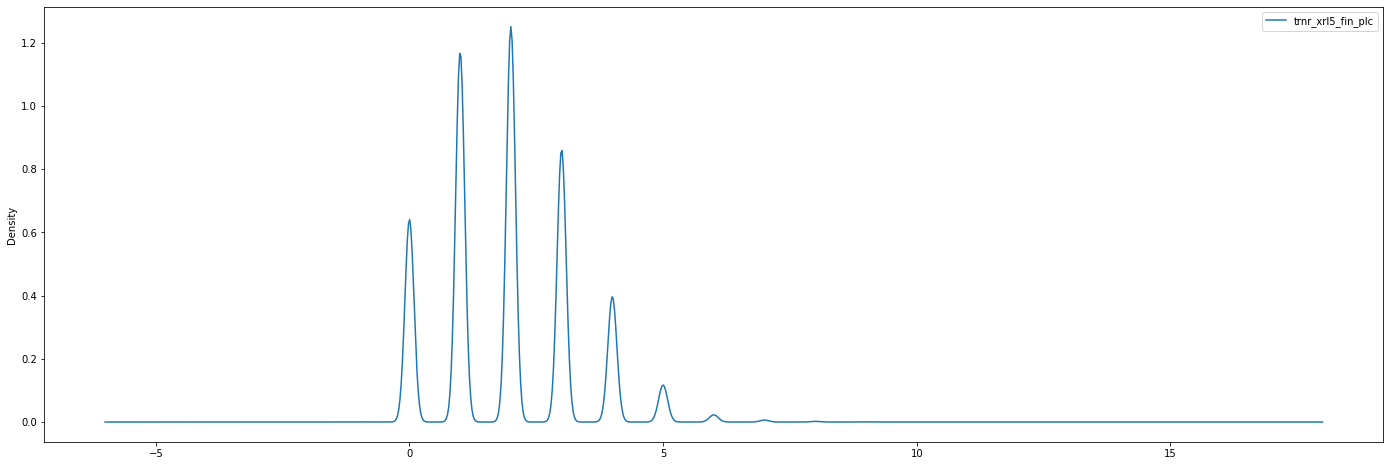

In [130]:

#df_base['x_races_tot_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_avg_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['x_rtgp_max_norm'].plot( kind='density', legend=True, figsize = (24,8) )

#df_base['y_margin'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['xr_wins_pct_norm'].plot( kind='density', legend=True, figsize = (24,8) )
#df_base['xr_finl5_last2_pct'].plot( kind='density', legend=True, figsize = (24,8) )

df_base['trnr_xrl5_fin_plc'].plot( kind='density', legend=True, figsize = (24,8) )


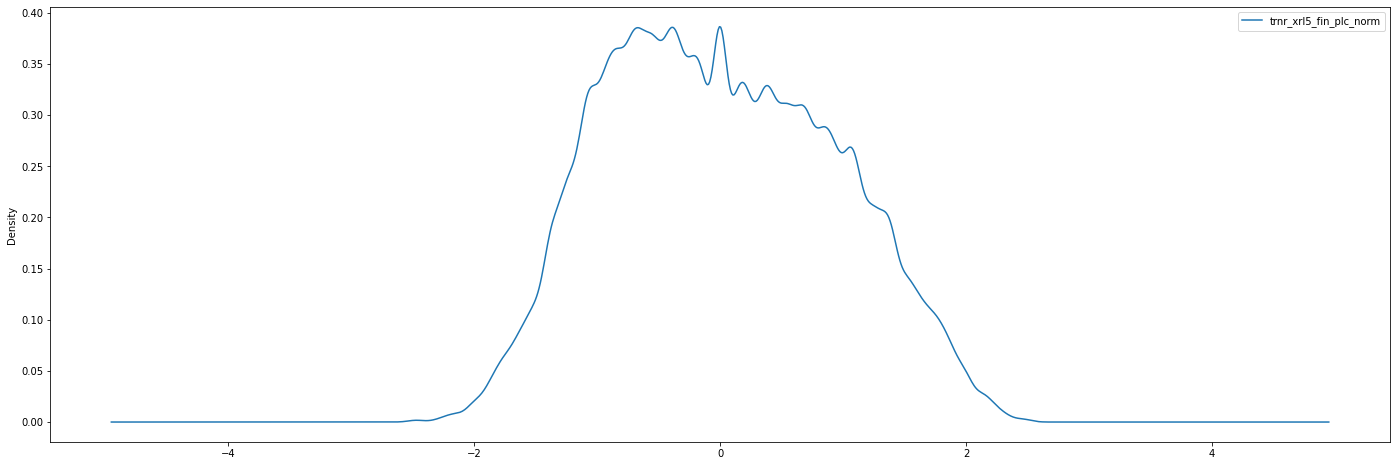

In [131]:
df_base['trnr_xrl5_fin_plc_norm'].plot( kind='density', legend=True, figsize = (24,8) )


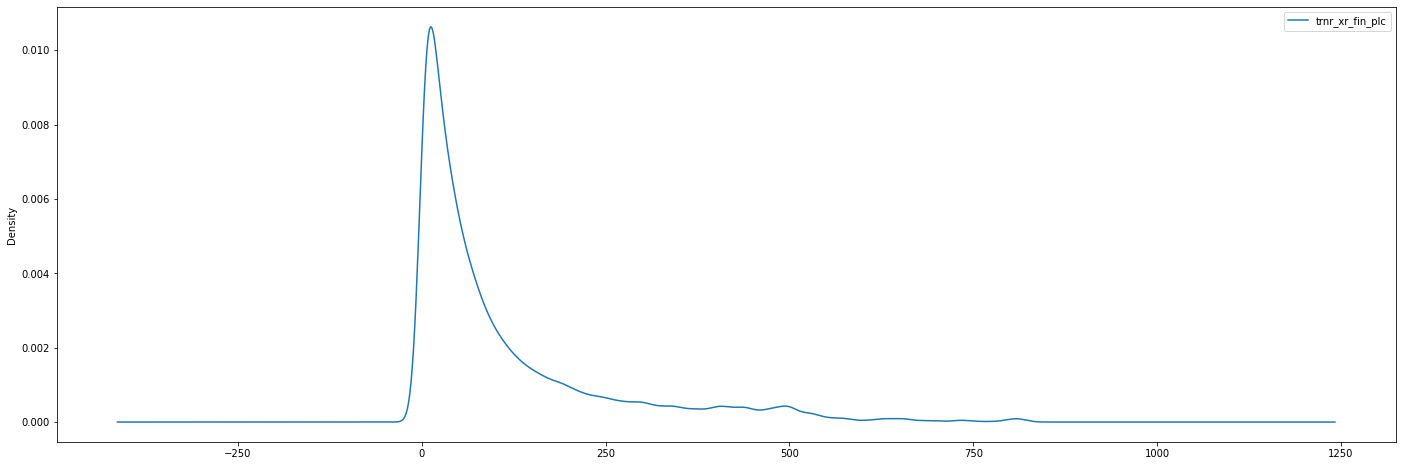

In [132]:

df_base['trnr_xr_fin_plc'].plot( kind='density', legend=True, figsize = (24,8) )


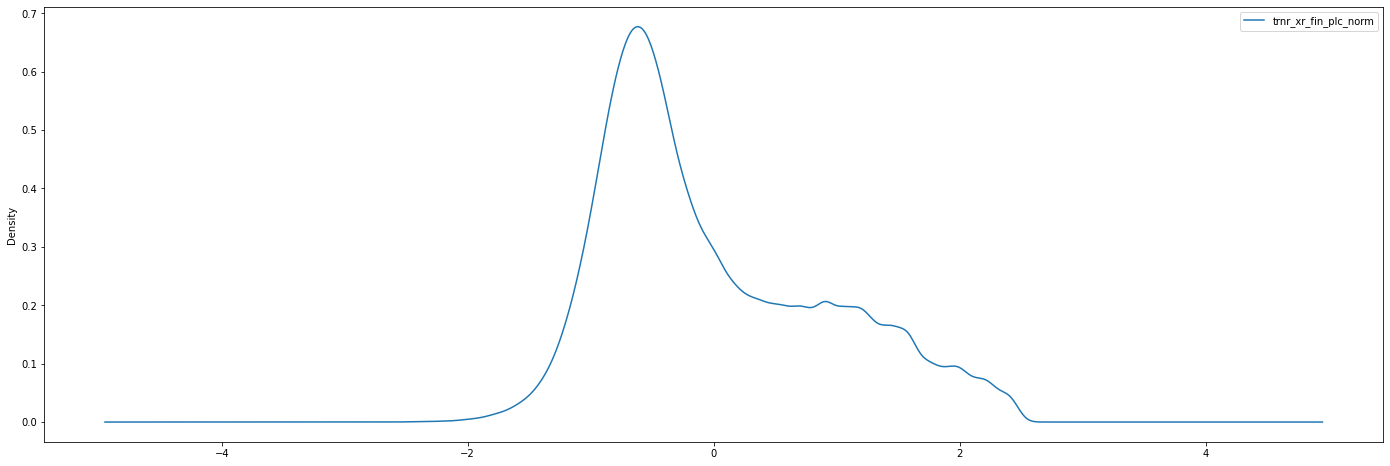

In [133]:

df_base['trnr_xr_fin_plc_norm'].plot( kind='density', legend=True, figsize = (24,8) )


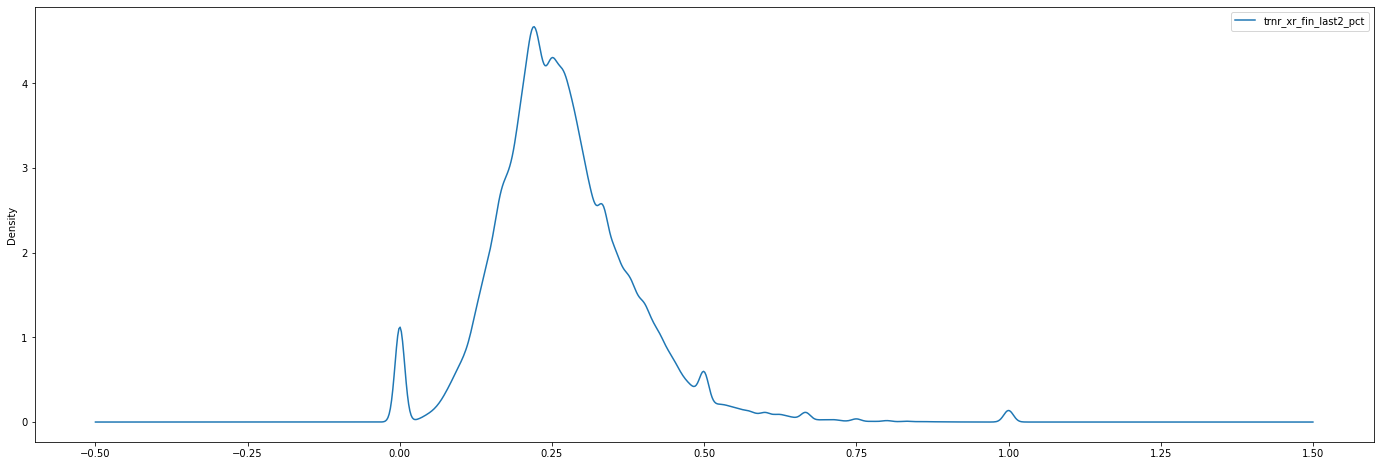

In [134]:

df_base['trnr_xr_fin_last2_pct'].plot( kind='density', legend=True, figsize = (24,8) )


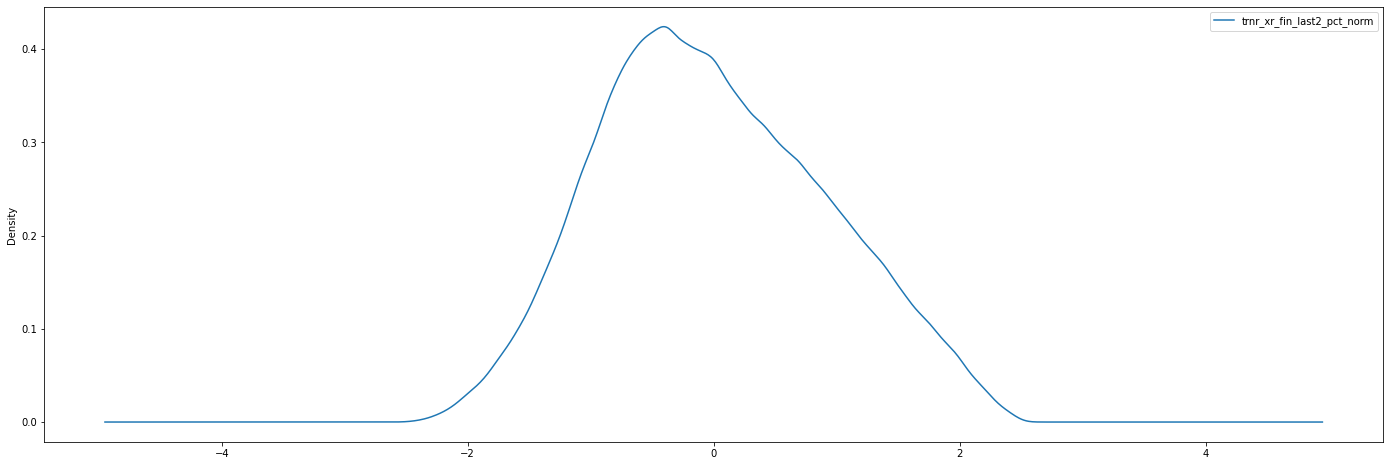

In [135]:

df_base['trnr_xr_fin_last2_pct_norm'].plot( kind='density', legend=True, figsize = (24,8) )


In [136]:

print(df_base.columns.values.tolist())


['@id_DOG', '@id_RACE', 'TrainerId', 'Handicap_x', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg_v0', 'x_rtgp_min_v0', 'x_rtgp_max_v0', 'x_rtgp_range_v0', 'x_rtgp_std_v0', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range', 'x_no_prev_r_in_dist', 'Handicap_y', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct', 'Event_Dt', 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_xr_fin_t2', 'tr

#### EXPORTING THE MODEL FILE

In [144]:

#keep_cols_for_export = ['@id_DOG', 'DogName', '@id_RACE','RaceName','Track','RaceGrade','Distance','TrainerName','RunTime','Place','x_races_tot']

# 'TrainerName', 'Track' have been dummified
#cols_to_keep = ['@id_DOG', 'DogName', 'y_runtime', 'RaceId', '@id_RACE', 'position', 'ft_sp', 'x_num_dogs', 'Top3_actual', 'position_random', 'position_fasttrack', 'Winner_fastrack', 'Top3_fastrack', 'Winner_actual', 'Winner_random', 'Top3_random']

#cols_for_drop = ['y_margin_y','y_pos_y']

#cols_for_drop = ['Handicap']
cols_for_drop = ['Handicap_x','Handicap_y']

#'Event_Dt', 

todaydt = datetime.now(local_tz).date()
print(todaydt)
exp_fname = f'normalised_vars_{todaydt}.csv'
print(exp_fname)

# Add columns containing 'v0' to cols_for_drop
cols_for_drop.extend([col for col in df_base.columns if 'v0' in col])

print(len(cols_for_drop))
print(cols_for_drop)

exp_ds = df_base.drop(columns = cols_for_drop).rename(columns = {'y_margin_x':'y_margin', 'y_pos_x':'y_pos'})


2023-06-08
normalised_vars_2023-06-08.csv
7
['Handicap_x', 'Handicap_y', 'x_rtgp_avg_v0', 'x_rtgp_min_v0', 'x_rtgp_max_v0', 'x_rtgp_range_v0', 'x_rtgp_std_v0']


In [145]:

print(pd.DataFrame(exp_ds.isna().sum()))


                            0
@id_DOG                     0
@id_RACE                    0
TrainerId                   0
x_races_tot                 0
x_dist_gp                   0
...                        ..
trnr_xr_wins_pct_norm       0
trnr_xr_fin_t2_pct_norm     0
trnr_xr_fin_plc_pct_norm    0
trnr_xr_fin_last_pct_norm   0
trnr_xr_fin_last2_pct_norm  0

[124 rows x 1 columns]


In [146]:

print(exp_ds.shape)


(725080, 124)


In [147]:

print(exp_ds.columns.values.tolist())


['@id_DOG', '@id_RACE', 'TrainerId', 'x_races_tot', 'x_dist_gp', 'x_runtm_gp', 'x_rtgp_prev', 'x_rtgp_avg', 'x_rtgp_min', 'x_rtgp_max', 'x_rtgp_std', 'x_rtgp_range', 'x_no_prev_races', 'x_speed_prev', 'x_speed_avg', 'x_speed_min', 'x_speed_max', 'x_speed_std', 'x_speed_range', 'x_no_prev_r_in_dist', 'xr_races', 'xr_races_l5', 'xr_wins', 'xr_wins_pct', 'xr_wins_l5', 'xr_wins_l5_pct', 'xr_fin_t2', 'xr_finl5_t2', 'xr_fin_t2_pct', 'xr_finl5_t2_pct', 'xr_fin_last', 'xr_fin_last_pct', 'xr_finl5_last', 'xr_finl5_last_pct', 'xr_fin_last2', 'xr_fin_last2_pct', 'xr_finl5_last2', 'xr_finl5_last2_pct', 'xr_fin_plc', 'xr_fin_plc_pct', 'xr_finl5_plc', 'xr_finl5_plc_pct', 'Event_Dt', 'trnr_xr_races_tot', 'trnr_xr_races_tot_prev', 'trnr_wins_prev', 'trnr_fin_plc_prev', 'trnr_fin_t2_prev', 'trnr_fin_last_prev', 'trnr_fin_last2_prev', 'trnr_xr_wins', 'trnr_xr_fin_plc', 'trnr_xr_fin_t2', 'trnr_xr_fin_last', 'trnr_xr_fin_last2', 'trnr_xrl5_wins', 'trnr_xrl5_fin_plc', 'trnr_xrl5_fin_t2', 'trnr_xrl5_fin_las

In [148]:

exp_ds.tail(5)


,@id_DOG,@id_RACE,TrainerId,x_races_tot,x_dist_gp,x_runtm_gp,x_rtgp_prev,x_rtgp_avg,x_rtgp_min,x_rtgp_max,x_rtgp_std,x_rtgp_range,x_no_prev_races,x_speed_prev,x_speed_avg,x_speed_min,x_speed_max,x_speed_std,x_speed_range,x_no_prev_r_in_dist,xr_races,xr_races_l5,xr_wins,xr_wins_pct,xr_wins_l5,...,xr_fin_plc_pct_norm,xr_finl5_plc_norm,xr_finl5_plc_pct_norm,trnr_xr_races_tot_norm,trnr_xr_races_tot_prev_norm,trnr_wins_prev_norm,trnr_fin_plc_prev_norm,trnr_fin_t2_prev_norm,trnr_fin_last_prev_norm,trnr_fin_last2_prev_norm,trnr_xr_wins_norm,trnr_xr_fin_plc_norm,trnr_xr_fin_t2_norm,trnr_xr_fin_last_norm,trnr_xr_fin_last2_norm,trnr_xrl5_wins_norm,trnr_xrl5_fin_plc_norm,trnr_xrl5_fin_t2_norm,trnr_xrl5_fin_last_norm,trnr_xrl5_fin_last2_norm,trnr_xr_wins_pct_norm,trnr_xr_fin_t2_pct_norm,trnr_xr_fin_plc_pct_norm,trnr_xr_fin_last_pct_norm,trnr_xr_fin_last2_pct_norm
725075,2145360049,642767973,106684,2,450,25.581522,25.698913,23.410000,23.410000,23.410000,0.267993,0.000000,0,17510.468215,17298.591647,17086.715079,17510.468215,299.638716,423.753136,0,2,3.0,0.0,0.0,0.0,...,0.959190,-0.408248,0.229709,-0.934878,-0.934878,0.000000,2.041241,2.041241,-0.645497,-0.645497,-0.939260,-0.829027,-0.840477,-1.234427,-0.936586,-0.912871,-0.597614,-0.597614,-1.118034,-0.645497,-1.309809,1.565569,1.694327,-1.373132,1.495161
725076,2145360049,679045389,106684,3,400,23.250000,23.410000,23.330000,23.250000,23.410000,0.113137,0.160000,0,17590.822180,17396.001824,17086.715079,17590.822180,270.846651,504.107101,0,3,4.0,0.0,0.0,0.0,...,0.438175,-0.300376,-0.075719,-1.278709,-1.278709,-0.585540,-0.544705,-0.544705,-0.585540,0.585540,-1.254188,-1.383826,-1.302899,-1.092005,-1.051451,-0.585540,-0.849591,-0.585540,-0.569803,0.449089,-1.668065,1.953062,0.597210,-1.819113,2.132879
725077,2145360049,683214211,106684,4,450,25.855435,25.581522,23.545430,23.244874,23.991811,0.283120,0.746937,0,17204.301075,17348.076637,17086.715079,17590.822180,241.023995,504.107101,0,4,5.0,0.0,0.0,0.0,...,-1.471191,-1.095445,-1.095445,-1.218230,-1.218230,-0.730297,-0.730297,-0.730297,0.000000,-0.730297,-0.754624,-1.157256,-1.038367,-0.730297,-0.762342,-0.730297,-1.227881,-0.707107,0.000000,1.414214,-0.871674,-0.681144,-1.017956,-0.906753,1.565248
725078,2145360049,726157416,106684,5,350,20.130000,19.814000,25.698913,25.698913,25.698913,0.206840,0.000000,0,17404.464624,17359.354234,17086.715079,17590.822180,210.250674,504.107101,1,5,5.0,0.0,0.0,0.0,...,-1.102315,-0.643796,-0.643796,-1.526835,-1.526835,0.000000,-0.724569,-0.724569,-0.353553,-0.540062,-0.953124,-1.134706,-1.042270,-1.009029,-1.242813,-0.999119,-0.623610,-0.532861,-0.935414,0.882919,-1.484902,-0.927989,-1.244887,-1.290165,1.455054
725079,2145360049,735164900,106684,6,400,23.080000,23.250000,25.640217,25.581522,25.698913,0.083008,0.117391,0,17386.984600,17363.959295,17086.715079,17590.822180,188.391922,504.107101,0,6,5.0,0.0,0.0,0.0,...,-1.567564,-0.511372,-0.511372,-0.785033,-0.785033,-0.377964,-1.069045,-0.801784,2.267787,2.267787,-0.803008,-0.775646,-0.775109,-0.716642,-0.726770,-0.726273,-0.944911,-0.726273,2.267787,1.351691,-1.599593,-0.858669,-1.385408,1.020262,1.816286


In [149]:

exp_ds.describe()


,@id_DOG,@id_RACE,TrainerId,x_races_tot,x_dist_gp,x_runtm_gp,x_rtgp_prev,x_rtgp_avg,x_rtgp_min,x_rtgp_max,x_rtgp_std,x_rtgp_range,x_no_prev_races,x_speed_prev,x_speed_avg,x_speed_min,x_speed_max,x_speed_std,x_speed_range,x_no_prev_r_in_dist,xr_races,xr_races_l5,xr_wins,xr_wins_pct,xr_wins_l5,...,xr_fin_plc_pct_norm,xr_finl5_plc_norm,xr_finl5_plc_pct_norm,trnr_xr_races_tot_norm,trnr_xr_races_tot_prev_norm,trnr_wins_prev_norm,trnr_fin_plc_prev_norm,trnr_fin_t2_prev_norm,trnr_fin_last_prev_norm,trnr_fin_last2_prev_norm,trnr_xr_wins_norm,trnr_xr_fin_plc_norm,trnr_xr_fin_t2_norm,trnr_xr_fin_last_norm,trnr_xr_fin_last2_norm,trnr_xrl5_wins_norm,trnr_xrl5_fin_plc_norm,trnr_xrl5_fin_t2_norm,trnr_xrl5_fin_last_norm,trnr_xrl5_fin_last2_norm,trnr_xr_wins_pct_norm,trnr_xr_fin_t2_pct_norm,trnr_xr_fin_plc_pct_norm,trnr_xr_fin_last_pct_norm,trnr_xr_fin_last2_pct_norm
count,7.250800e+05,7.250800e+05,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,725080.000000,...,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05,7.250800e+05
mean,4.866356e+08,7.640069e+08,111702.449377,20.092517,414.921327,24.288610,24.075946,24.031286,23.678688,24.508748,0.314599,0.830060,0.042082,16383.901335,16379.381781,15866.486933,16795.481739,261.329562,928.952724,0.122938,20.092517,4.598293,3.056668,0.153317,0.637501,...,-1.077850e-15,1.143982e-14,8.363401e-15,2.810828e-16,3.473851e-16,-2.208339e-14,4.635336e-14,7.537867e-14,-2.057114e-14,-2.144141e-14,1.677031e-15,6.697351e-18,1.675093e-15,-2.284769e-16,-3.006589e-16,2.977280e-14,-2.514007e-15,-3.346497e-15,8.075460e-15,-1.862372e-15,-3.217045e-15,-4.936058e-16,-1.660400e-15,7.030896e-16,-2.448538e-15
std,1.219313e+08,7.786416e+07,78747.029834,17.819576,78.150315,4.646626,5.097870,4.809930,4.772877,4.880562,0.194952,0.715255,0.200777,3459.546514,3447.694940,3362.879397,3559.951694,188.917709,687.335695,0.328366,17.819576,1.030498,3.530232,0.160202,0.848094,...,9.226071e-01,9.207404e-01,9.208302e-01,9.279231e-01,9.278956e-01,7.582635e-01,9.024508e-01,8.796393e-01,7.584699e-01,8.797201e-01,9.269565e-01,9.276942e-01,9.275195e-01,9.271462e-01,9.276541e-01,9.188601e-01,9.268874e-01,9.263806e-01,9.210593e-01,9.265198e-01,9.245245e-01,9.275255e-01,9.277002e-01,9.243014e-01,9.276630e-01
min,1.083910e+08,6.238619e+08,6418.000000,0.000000,-999.000000,-62.082592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00,-2.474874e+00
25%,4.159944e+08,6.985139e+08,65438.000000,6.000000,350.000000,20.713636,20.626027,20.651465,20.367123,21.112573,0.220017,0.396752,0.000000,16806.722689,16883.241729,16302.016302,17248.722317,191.098862,585.763208,0.000000,6.000000,5.000000,1.000000,0.016667,0.000000,...,-6.838420e-01,-7.071068e-01,-7.071068e-01,-7.013902e-01,-7.012007e-01,-4.082483e-01,-7.245688e-01,-5.855400e-01,-4.082483e-01,-5.855400e-01,-6.891302e-01,-6.968714e-01,-6.956006e-01,-7.002407e-01,-7.026096e-01,-7.245688e-01,-7.245688e-01,-7.302967e-01,-7.245688e-01,-7.262730e-01,-6.969568e-01,-6.959667e-01,-6.911600e-01,-6.848161e-01,-6.874624e-01
50%,4.791464e+08,7.654781e+

### Export

In [151]:

print(datetime.now(local_tz))
exp_ds.to_csv(f'{outloc}/{exp_fname}', index = False)
print(datetime.now(local_tz))

# 15 min runtime @ 2023 06 (June) 08


2023-06-08 17:40:51.161066+05:30
2023-06-08 17:51:19.601505+05:30


In [152]:

print("THE END")


THE END


In [153]:

print(exp_fname)


normalised_vars_2023-06-08.csv
